In [1]:
import gower
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import chi2
from sklearn.manifold import TSNE
from pyod.models.kde import KDE
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors as knn
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score

In [2]:
path = "Data/dataset.csv"
# Load dataset
dataset = pd.read_csv(path, sep=";", decimal=",")
dataset = dataset.iloc[:, 1:-2]
dataset

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0.004717,0.113092,0.128763,0.379630,0.121875
7196,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.200000,0.030641,0.005017,0.333333,0.005469
7197,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.206250
7198,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688


In [4]:
dist_matrix = gower.gower_matrix(dataset)
labels = pd.read_csv("Data/outliers.csv")["Outliers"]

/var/folders/5d/lh100_9d5d7bwtxzmg0zcdmh0000gn/T/ipykernel_59919/3949685284.py:17: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  print(legend.legendHandles)


[<matplotlib.lines.Line2D object at 0x129b32010>, <matplotlib.lines.Line2D object at 0x129b33290>, <matplotlib.lines.Line2D object at 0x129b28590>, <matplotlib.lines.Line2D object at 0x129b3f650>, <matplotlib.lines.Line2D object at 0x129b2a4d0>]


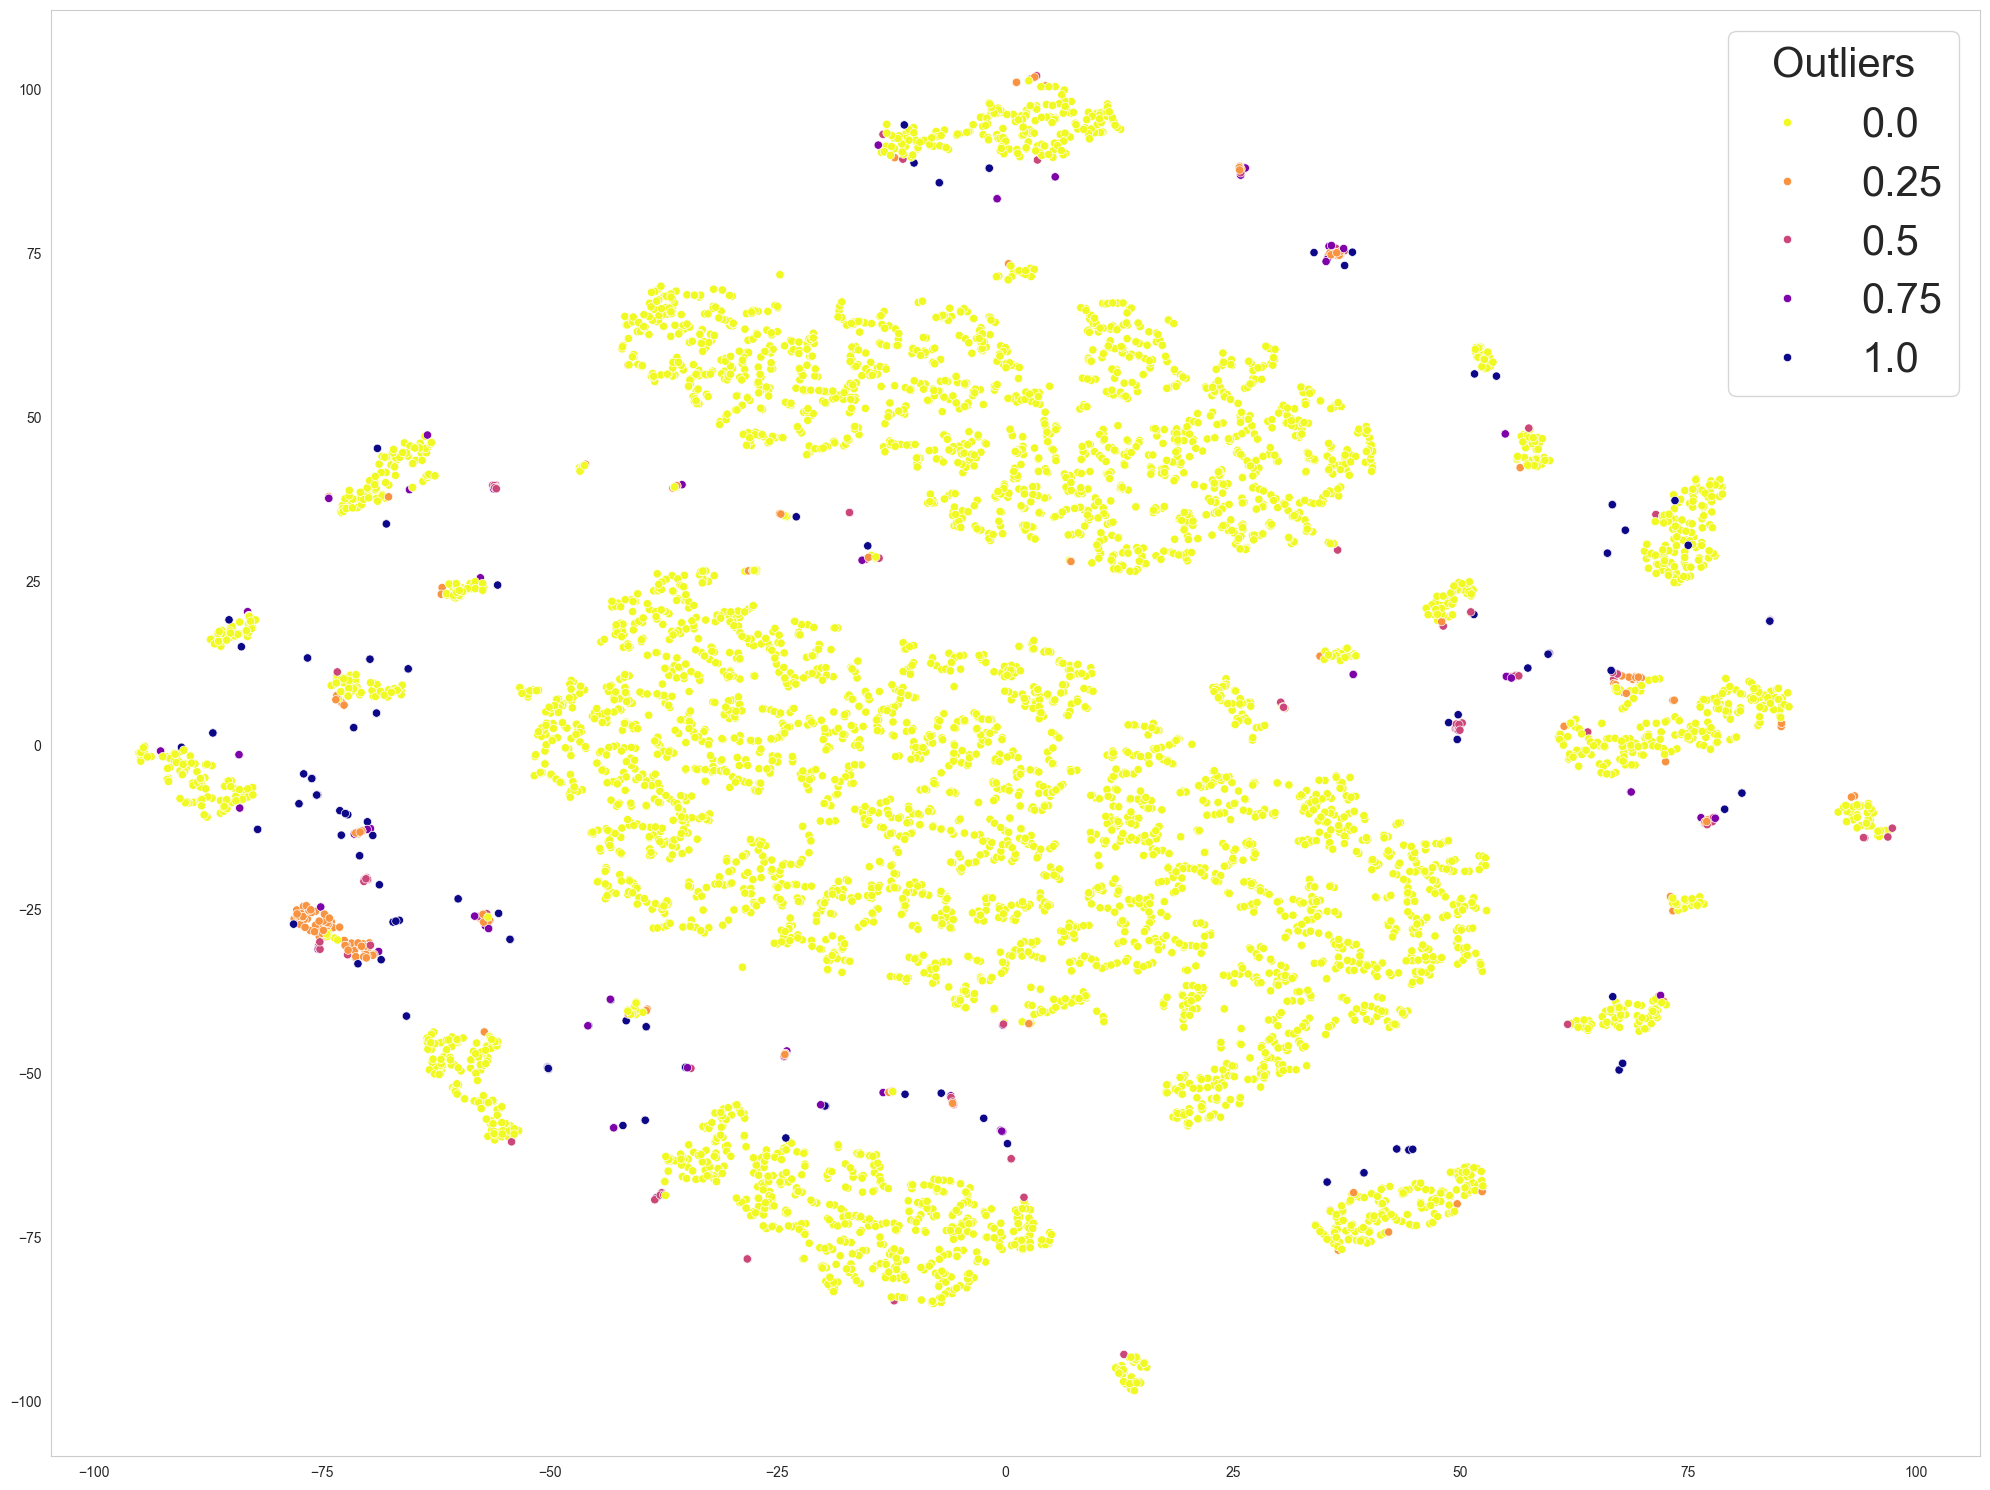

In [13]:
tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=1000, metric="precomputed", init='random', random_state=42)
tsne_results = tsne.fit_transform(dist_matrix)

if len(set(labels)) == 2:
    palette = ["#6E1F81", "#FCA06E"]
    title = "Outliers Score"
else:
    palette = "plasma_r"
    title = "Outliers"

# create a big figure with a white background
plt.figure(figsize=(20, 15))
#sns.set(font_scale=3)
sns.set_style("whitegrid", {'axes.grid': False})
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette=palette, hue=labels, legend='full')
legend = plt.legend(title=title, loc='upper right', title_fontsize = 30 ,prop = {'size': 30})
print(legend.legendHandles)
for handle in legend.legend_handles:
    handle._sizes = [500]
plt.tight_layout()
# plt.savefig(path)
plt.show()

In [17]:
legend.legendHandles[0]._sizes

/var/folders/5d/lh100_9d5d7bwtxzmg0zcdmh0000gn/T/ipykernel_59919/2844005585.py:1: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes


[500]